# Fruit Freshness Detection

## Import all the Dependencies

In [ ]:
# to interact with the operating system, such as accessing files and directories
import os

# high-level file operations
import shutil

# to display progress bars during iterations in a Jupyter Notebook
from tqdm.notebook import tqdm as tq

#  data manipulation and analysis
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import random

# splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# TensorFlow library for machine learning and deep learning tasks
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Sequential, Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the zip file
zip_path = '/content/drive/MyDrive/fruits.zip'
destination_path = '/content/data'
!unzip "$zip_path" -d "$destination_path"

Archive:  /content/drive/MyDrive/fruits.zip
   creating: /content/data/fruits/
   creating: /content/data/fruits/FreshApple/
  inflating: /content/data/fruits/FreshApple/FreshApple (1).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (10).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (100).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (101).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (102).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (103).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (104).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (105).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (106).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (107).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (108).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (109).jpg  
  inflating: /content/data/fruits/FreshApple/FreshApple (11).j

In [ ]:

# specifies the directory path where the files are located
dataSource = '/content/data'

# initializes an empty list
file_name = []
tag = []
full_path = []

# a nested loop to traverse the directory structure
for path, subdirs, files in os.walk(dataSource):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(os.path.basename(path))
        file_name.append(name)

In [ ]:
# creates a pandas DataFrame and performs a grouping operation
df = pd.DataFrame({"path":full_path, "file_name":file_name, "tag":tag})
df.groupby(['tag']).size()

tag
FreshApple           200
FreshBanana          200
FreshGrape           200
FreshGuava           200
FreshJujube          200
FreshOrange          200
FreshPomegranate     200
FreshStrawberry      200
RottenApple          200
RottenBanana         200
RottenGrape          200
RottenGuava          200
RottenJujube         200
RottenOrange         200
RottenPomegranate    200
RottenStrawberry     200
dtype: int64

In [ ]:
# display the first few rows of the DataFrame
df.head()

,path,file_name,tag
0,/content/data/fruits/FreshOrange/FreshOrange (...,FreshOrange (76).jpg,FreshOrange
1,/content/data/fruits/FreshOrange/FreshOrange (...,FreshOrange (43).jpg,FreshOrange
2,/content/data/fruits/FreshOrange/FreshOrange (...,FreshOrange (180).jpg,FreshOrange
3,/content/data/fruits/FreshOrange/FreshOrange (...,FreshOrange (49).jpg,FreshOrange
4,/content/data/fruits/FreshOrange/FreshOrange (...,FreshOrange (123).jpg,FreshOrange


## Split Dataset

In [ ]:
x = df['path']
y = df['tag']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=300
)

# split the data into testing and validation sets
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=100
)

In [ ]:
# merge into each dataframe
df_tr = pd.DataFrame(
    {
        'path':x_train,
        'tag':y_train,
        'set':'train'
    }
)

df_te = pd.DataFrame(
    {
        'path':x_test,
        'tag':y_test,
        'set':'test'
    }
)

df_val = pd.DataFrame(
    {
        'path':x_val,
        'tag':y_val,
        'set':'validation'
    }
)

In [ ]:
# prints the sizes
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 2560
val size 320
test size 320


In [ ]:
# generates a combined DataFrame
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

# randomly selects and prints three rows from the DataFrame
df_all.sample(3)



set         tag              
test        FreshApple            17
            FreshBanana           22
            FreshGrape            24
            FreshGuava            17
            FreshJujube           28
            FreshOrange           13
            FreshPomegranate      26
            FreshStrawberry       22
            RottenApple           21
            RottenBanana          13
            RottenGrape           19
            RottenGuava           26
            RottenJujube          18
            RottenOrange          18
            RottenPomegranate     19
            RottenStrawberry      17
train       FreshApple           170
            FreshBanana          158
            FreshGrape           159
            FreshGuava           158
            FreshJujube          149
            FreshOrange          159
            FreshPomegranate     155
            FreshStrawberry      162
            RottenApple          158
            RottenBanana         166
       

<ipython-input-10-d78e3fc86f75>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\


,path,tag,set
1572,/content/data/fruits/FreshBanana/FreshBanana (...,FreshBanana,train
2,/content/data/fruits/FreshBanana/FreshBanana (...,FreshBanana,train
672,/content/data/fruits/FreshStrawberry/FreshStra...,FreshStrawberry,train


## Visualize some of the images from dataset

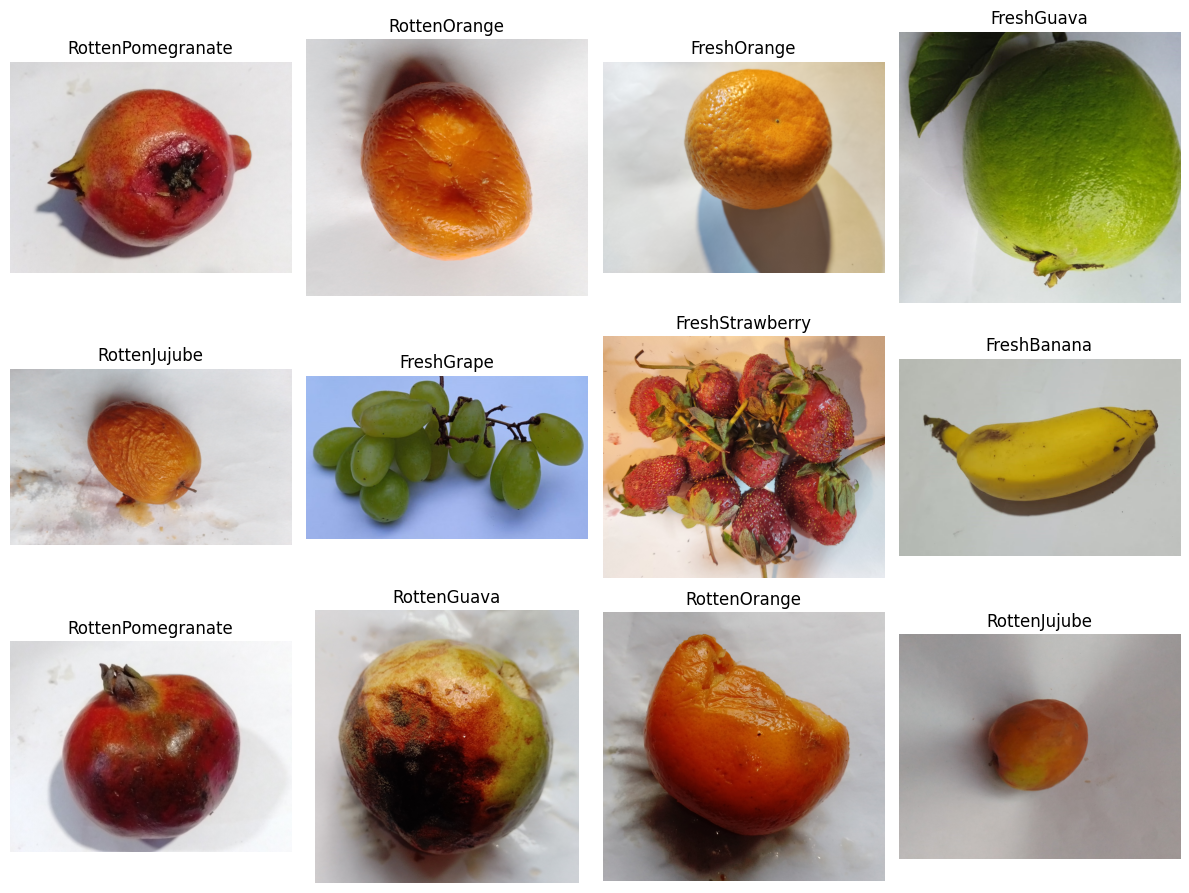

In [ ]:
# Select a random subset of 12 images
random_indices = random.sample(range(len(df_all)), 12)
subset_df = df_all.iloc[random_indices]

# Display the images in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
axes = axes.flatten()

for i, (index, row) in enumerate(subset_df.iterrows()):
    image_path = row['path']
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(row['tag'])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define the data directories
datasource_path = "/content/data/fruits/"
dataset_path = "/content/dataset/"

In [ ]:
for index, row in tq(df_all.iterrows()):

    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])

    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))

    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)

    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

## Building the Model

In [ ]:
# Set the input parameters
dim = (150, 150)
channel = (3,)
input_shape = dim + channel
batch_size = 16
epoch = 20

In [ ]:
# Function to create a data generator from an ImageDataGenerator object
def create_tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, input_shape[0], input_shape[1], input_shape[2]], [None, num_class])
    )
    return tf_generator

In [ ]:
# Function to train the model
from tensorflow.keras.applications import InceptionV3

def train_model(train_data, val_data, input_shape, num_class):
    base_model = InceptionV3(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet',
        classes=num_class,
    )

    for layer in base_model.layers[:-10]:  # Unfreeze the last 10 layers
        layer.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(512, activation="relu")(x)
    predictions = layers.Dense(num_class, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(
        train_data,
        steps_per_epoch=len(train_generator),
        epochs=epoch,
        validation_data=val_data,
        validation_steps=len(val_generator),
        shuffle=True,
        verbose=1
    )

    return model, history

In [ ]:
# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train/',
    target_size=dim,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset/validation/',
    target_size=dim,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test/',
    target_size=dim,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2560 images belonging to 16 classes.
Found 320 images belonging to 16 classes.
Found 320 images belonging to 16 classes.


In [ ]:
# Get the number of classes and labels
num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

In [ ]:
# Create TensorFlow data generators
train_data = create_tf_data_generator(train_generator, input_shape)
val_data = create_tf_data_generator(val_generator, input_shape)
test_data = create_tf_data_generator(test_generator, input_shape)

In [ ]:
# Train the model
model, history = train_model(train_data, val_data, input_shape, num_class)

87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/20
160/160 [==============================] - 312s 2s/step - loss: 1.1403 - accuracy: 0.6711 - val_loss: 0.6437 - val_accuracy: 0.7688
Epoch 2/20
160/160 [==============================] - 270s 2s/step - loss: 0.5232 - accuracy: 0.8273 - val_loss: 0.4647 - val_accuracy: 0.8438
Epoch 3/20
160/160 [==============================] - 275s 2s/step - loss: 0.4220 - accuracy: 0.8531 - val_loss: 0.4806 - val_accuracy: 0.8500
Epoch 4/20
160/160 [==============================] - 282s 2s/step - loss: 0.3615 - accuracy: 0.8723 - val_loss: 0.4525 - val_accuracy: 0.8500
Epoch 5/20
160/160 [==============================] - 294s 2s/step - loss: 0.3553 - accuracy: 0.8785 - val_loss: 0.3479 - val_accuracy: 0.8656
Epoch 6/20
160/160 [==============================] - 272s 2s/step - loss: 0.3106 - accuracy: 0.8918 - val_loss: 0.3944 - val_accuracy: 0.8500
Epoch 7/20
160/160 [==============================] - 263s 2s/step - loss: 0.

In [ ]:
# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

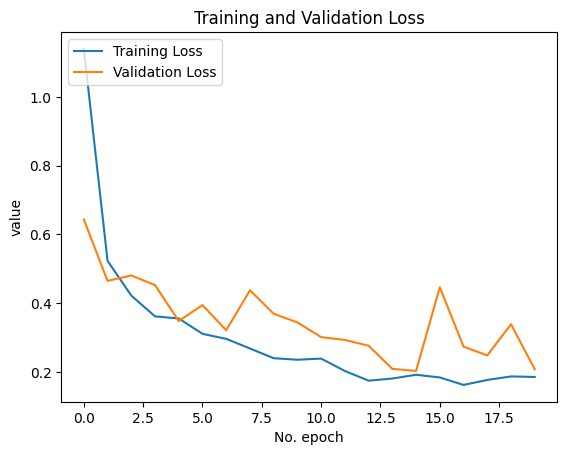

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

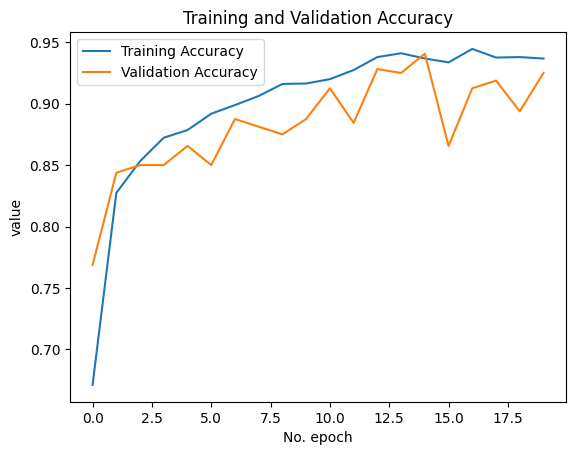

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

1/1 [==============================] - 1s 991ms/step


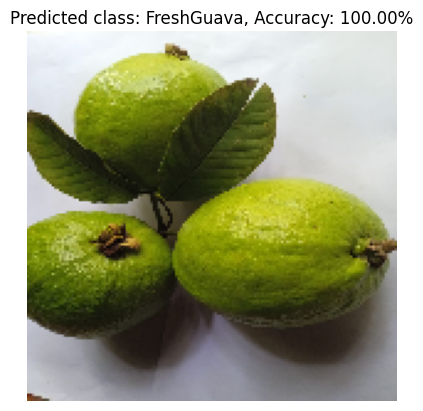

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the test image
test_image_path = '/content/dataset/test/FreshGuava/FreshGuava (181).jpg'
test_image = image.load_img(test_image_path, target_size=dim)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Perform prediction
predictions = model.predict(test_image)
class_index = np.argmax(predictions[0])
predicted_class = list(labels)[class_index]
accuracy = predictions[0][class_index] * 100

# Display the test image and predicted class
plt.imshow(test_image[0])
plt.title(f'Predicted class: {predicted_class}, Accuracy: {accuracy:.2f}%')
plt.axis('off')
plt.show()


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(train_data, steps=len(train_generator), verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc, loss))

loss, acc = model.evaluate(test_data, steps=len(test_generator), verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc, loss))

Accuracy on training data: 0.9633 
Loss on training data: 0.1003
Accuracy on test data: 0.9125 
Loss on test data: 0.2163


## Export model

### Export to TFJS

In [ ]:
import tensorflowjs as tfjs

# Define the output directory
output_dir = "tfjs_model"

# Convert and save the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, output_dir)

print("Model successfully exported to TensorFlow.js format.")


Model successfully exported to TensorFlow.js format.


### Export to TFLite

In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_file = "model.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

print("Model successfully exported to TensorFlow Lite (TFLite) format.")


Model successfully exported to TensorFlow Lite (TFLite) format.


### Export to Saved Model

In [ ]:
# Save the model
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

In [ ]:
if not os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)):
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

In [ ]:
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path, include_optimizer=False)

Saving Model At model/medium_project/model.h5...


Found 320 images belonging to 16 classes.
10/10 [==============================] - 32s 3s/step


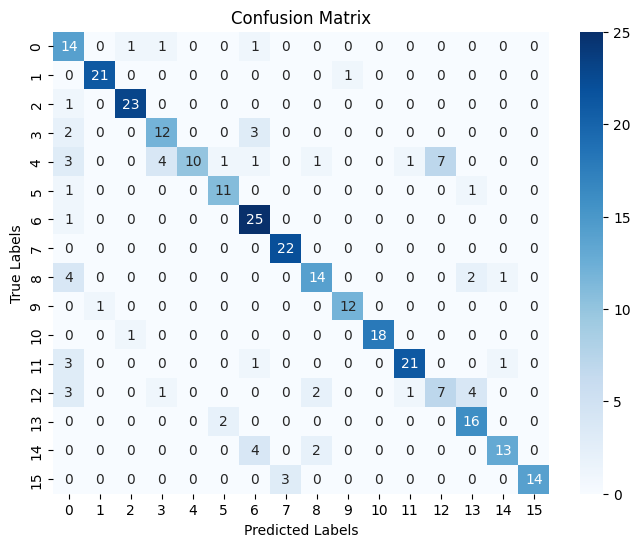


Classification Report:
                   precision    recall  f1-score   support

       FreshApple       0.44      0.82      0.57        17
      FreshBanana       0.95      0.95      0.95        22
       FreshGrape       0.92      0.96      0.94        24
       FreshGuava       0.67      0.71      0.69        17
      FreshJujube       1.00      0.36      0.53        28
      FreshOrange       0.79      0.85      0.81        13
 FreshPomegranate       0.71      0.96      0.82        26
  FreshStrawberry       0.88      1.00      0.94        22
      RottenApple       0.74      0.67      0.70        21
     RottenBanana       0.92      0.92      0.92        13
      RottenGrape       1.00      0.95      0.97        19
      RottenGuava       0.91      0.81      0.86        26
     RottenJujube       0.50      0.39      0.44        18
     RottenOrange       0.70      0.89      0.78        18
RottenPomegranate       0.87      0.68      0.76        19
 RottenStrawberry       1.00   

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
model = tf.keras.models.load_model('/content/model/medium_project/model.h5')

# Set batch size and image dimensions
batch_size = 32
desired_height = 224
desired_width = 224

# Create the test data generator
test_data_dir = '/content/dataset/test/'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(desired_height, desired_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Perform predictions on the test data generator
preds = model.predict(test_generator)

# Get the predicted labels and true labels
predicted_labels = np.argmax(preds, axis=1)
true_labels = test_generator.classes

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)
print('\nClassification Report:')
print(report)


1/1 [==============================] - 1s 1s/step


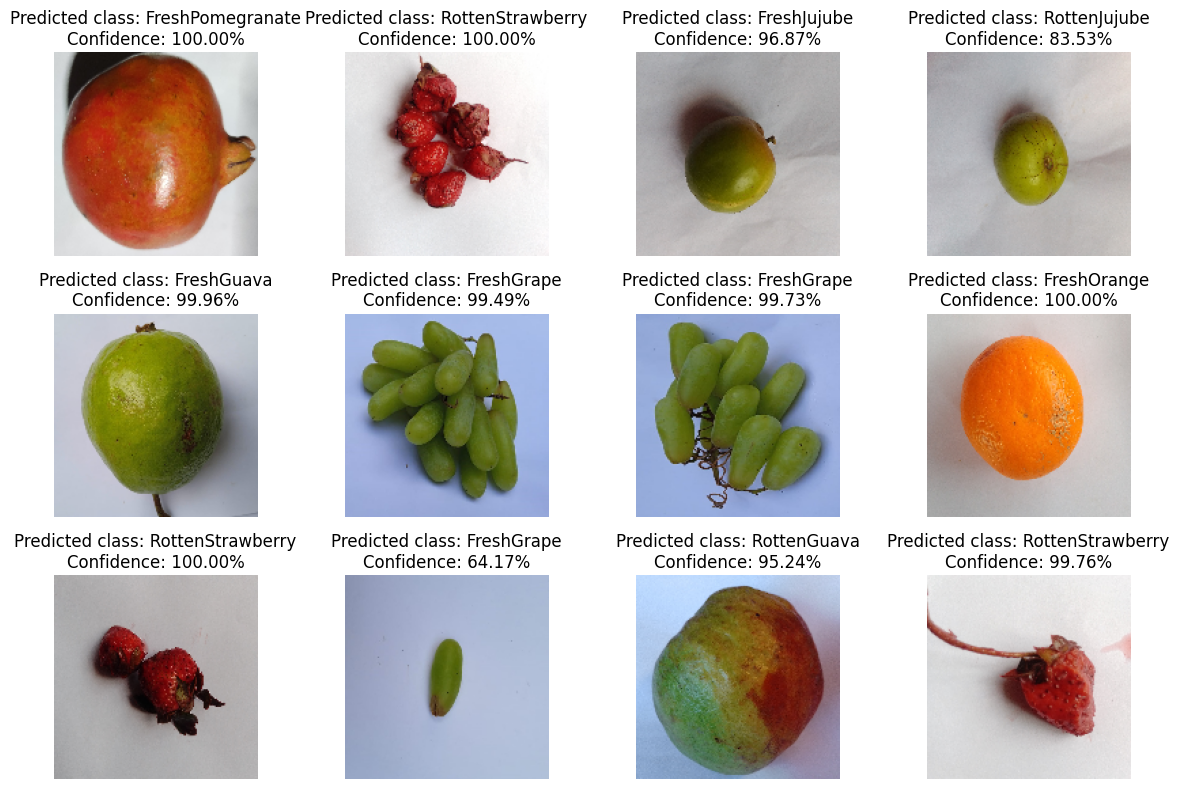

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/model/medium_project/model.h5')

# Set the number of random images to select
num_images = 12

# Set the image dimensions
desired_height = 150
desired_width = 150

# Get the list of image paths from the test directory
test_data_dir = '/content/dataset/test/'
image_paths = []
for root, dirs, files in os.walk(test_data_dir):
    for file in files:
        image_paths.append(os.path.join(root, file))

# Select random images from the test directory
random.shuffle(image_paths)
selected_image_paths = image_paths[:num_images]

# Load and preprocess the selected test images
test_images = []
for image_path in selected_image_paths:
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(desired_height, desired_width))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = test_image / 255.0  # Normalize the image
    test_images.append(test_image)

# Convert the list of images to a NumPy array
test_images = np.array(test_images)

# Perform predictions on the test images
predictions = model.predict(test_images)

# Display the test images and predicted classes
class_names = sorted(os.listdir(test_data_dir))
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
axes = axes.flatten()
for i, (image, prediction) in enumerate(zip(test_images, predictions)):
    class_index = np.argmax(prediction)
    predicted_class = class_names[class_index]
    confidence = prediction[class_index] * 100

    axes[i].imshow(image)
    axes[i].set_title(f'Predicted class: {predicted_class}\nConfidence: {confidence:.2f}%')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 2s 2s/step


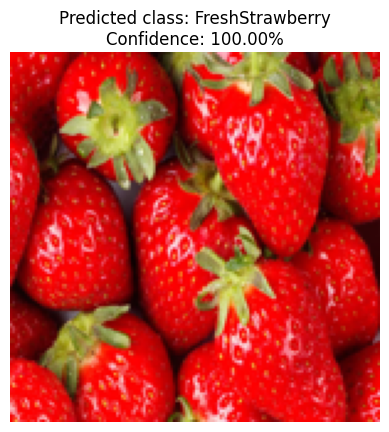

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('/content/model/medium_project/model.h5')

# Set the image dimensions
desired_height = 150
desired_width = 150

# Load and preprocess the uploaded image
uploaded_image_path = '/content/test1.jpg'  # Replace with the path to your uploaded image
uploaded_image = Image.open(uploaded_image_path)
uploaded_image = uploaded_image.resize((desired_width, desired_height))
uploaded_image = tf.keras.preprocessing.image.img_to_array(uploaded_image)
uploaded_image = uploaded_image / 255.0  # Normalize the image
uploaded_image = np.expand_dims(uploaded_image, axis=0)

# Perform prediction on the uploaded image
prediction = model.predict(uploaded_image)[0]
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
confidence = prediction[predicted_class_index] * 100

# Display the uploaded image and predicted class
plt.imshow(uploaded_image[0])
plt.title(f'Predicted class: {predicted_class}\nConfidence: {confidence:.2f}%')
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 1s/step


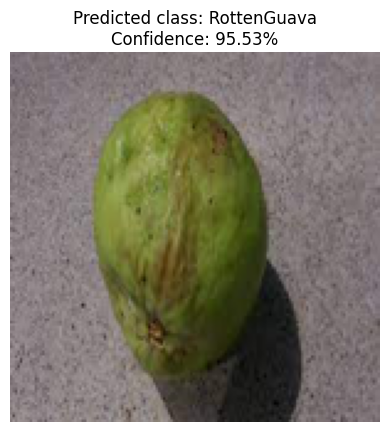

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('/content/model/medium_project/model.h5')

# Set the image dimensions
desired_height = 150
desired_width = 150

# Load and preprocess the uploaded image
uploaded_image_path = '/content/test2.jpg'  # Replace with the path to your uploaded image
uploaded_image = Image.open(uploaded_image_path)
uploaded_image = uploaded_image.resize((desired_width, desired_height))
uploaded_image = tf.keras.preprocessing.image.img_to_array(uploaded_image)
uploaded_image = uploaded_image / 255.0  # Normalize the image
uploaded_image = np.expand_dims(uploaded_image, axis=0)

# Perform prediction on the uploaded image
prediction = model.predict(uploaded_image)[0]
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
confidence = prediction[predicted_class_index] * 100

# Display the uploaded image and predicted class
plt.imshow(uploaded_image[0])
plt.title(f'Predicted class: {predicted_class}\nConfidence: {confidence:.2f}%')
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 1s/step


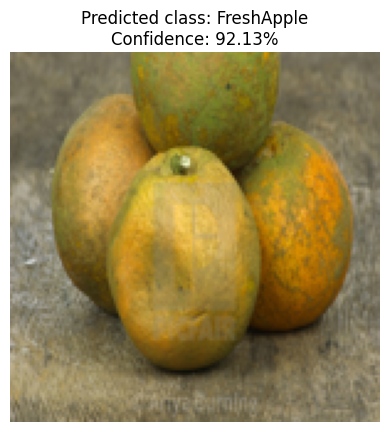

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('/content/model/medium_project/model.h5')

# Set the image dimensions
desired_height = 150
desired_width = 150

# Load and preprocess the uploaded image
uploaded_image_path = '/content/test3.jpg'  # Replace with the path to your uploaded image
uploaded_image = Image.open(uploaded_image_path)
uploaded_image = uploaded_image.resize((desired_width, desired_height))
uploaded_image = tf.keras.preprocessing.image.img_to_array(uploaded_image)
uploaded_image = uploaded_image / 255.0  # Normalize the image
uploaded_image = np.expand_dims(uploaded_image, axis=0)

# Perform prediction on the uploaded image
prediction = model.predict(uploaded_image)[0]
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
confidence = prediction[predicted_class_index] * 100

# Display the uploaded image and predicted class
plt.imshow(uploaded_image[0])
plt.title(f'Predicted class: {predicted_class}\nConfidence: {confidence:.2f}%')
plt.axis('off')
plt.show()
